<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
#ваш код здесь
hh_database = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_database.shape


(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
#ваш код здесь
hh_database.tail()
hh_database.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
hh_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
cols_null_percent = hh_database.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [7]:
hh_database.describe(include='object')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
hh_database['Образование'] = hh_database['Образование и ВУЗ'].apply(lambda x:x.split(' образование')[0])
hh_database = hh_database.drop('Образование и ВУЗ', axis=1)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
# Преобразуем пол в знак пола
hh_database['Пол'] = hh_database['Пол, возраст'].apply(lambda x: 'M' if x.split(' ,')[0] == 'Мужчина' else 'Ж')

# Вытаскиваем возраст в виде числа
hh_database['Возраст'] = hh_database['Пол, возраст'].apply(lambda x: int(x.split(' , ')[1].split(' ')[1]))

# Удаляем столбец
hh_database = hh_database.drop('Пол, возраст', axis=1)


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
#ваш код здесь
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы'].copy()
# Обозначение скрытых пропусков
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].apply(lambda x: np.nan if x == 'Не указано' else x)

# Если не Nan, то разделим строку на слова
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].apply(lambda x: x.split('  ')[0].split(' ') if type(x) == str else x )

# Если длина списка равна 6, то список содержит и год и месяц. Делаем вычисления.
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].apply(lambda x: (int(x[2])*12 + int(x[4])) if type(x) == list and len(x) == 6 else x)

# Узначем значение элемента под 3 индексом и делаем вычисления
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].apply(lambda x: int(x[2])*12 if type(x) == list and x[3] in ['год', 'лет', 'года'] else x)
hh_database['Опыт работы (месяц)'] = hh_database['Опыт работы (месяц)'].apply(lambda x: int(x[2]) if type(x) == list and x[3] in ['месяц', 'месяцев', 'месяца'] else x)

# Удаляем столбец
hh_database = hh_database.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
# Сначала восстановим данные, которые были утеряны.
hh_database['Город, переезд, командировки'] = hh_database['Город, переезд, командировки'].apply(lambda x: x if x.endswith('командировкам') else x + ' , не потерялась')

# Создание признака город
hh_database['Город'] = hh_database['Город, переезд, командировки'].apply(lambda x: x.split(' , ')[0].split(' ')[0])
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
common_lst = ['Москва', 'Санкт-Петербург', 'город-миллионник']
hh_database['Город'] = hh_database['Город'].apply(lambda x: 'город-миллионник' if x in million_cities else x)
hh_database['Город'] = hh_database['Город'].apply(lambda x: 'другие' if x not in common_lst else x)

# Создание признака готовность к переезду
hh_database['Готовность к переезду'] = hh_database['Город, переезд, командировки'].apply(lambda x: False if x.split(' , ')[-2].split(' ')[0] == 'не' else True)

# Создание признака готовность к командировкам
hh_database['Готовность к командировкам'] = hh_database['Город, переезд, командировки'].apply(lambda x: False if x.split(' , ')[-1].split(' ')[0] == 'не' else True)

# Удаление первоначального столбца
hh_database = hh_database.drop('Город, переезд, командировки', axis=1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
#ваш код здесь
# Создание признака-мигалки для признака занятости
schedule = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

for col in schedule:
    hh_database[col] = hh_database['Занятость'].apply(lambda x: True if col in x else False)

# Создание признака-мигалки для признака графика
employment = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for col in employment:
    hh_database[col] = hh_database['График'].apply(lambda x: True if col in x else False)
 
# Удаление первоначального столбца
hh_database = hh_database.drop('Занятость', axis=1)
hh_database = hh_database.drop('График', axis=1)    


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
#!Внимание! Если запуск ячейки дает ошибку, то нужо перезапустить код целиком - выполнить все.

# Обновление признака даты в двух таблицах
hh_database['Обновление резюме'] = pd.to_datetime(hh_database['Обновление резюме'], dayfirst=True).dt.date

exchange = pd.read_csv('data/ExchangeRates.csv', sep=(','), usecols=['currency','date', 'proportion', 'close'])
exchange['date'] = exchange['date'].apply(lambda x: x.split('/')[0] + '/' + x.split('/')[1] + '/' + '20' + x.split('/')[2])
exchange['date'] = pd.to_datetime(exchange['date'], dayfirst=True).dt.date

# Выделение столбца с валютой и обновление ее названий по стандарту. Обновлние признака ЗП.
hh_database['Валюта'] = hh_database['ЗП'].apply(lambda x: x.split(' ')[1])

currency_name = {'грн.': 'UAH', 'бел.руб.': 'BYN', 'сум': 'UZS'}

for new_name in currency_name:
    hh_database['Валюта'] = hh_database['Валюта'].apply(lambda x: currency_name[new_name] if x == new_name else x)

hh_database['ЗП'] = hh_database['ЗП'].apply(lambda x: int(x.split(' ')[0]))

# Присоединение таблицы и заполнение признака close
hh_database = hh_database.merge(
    exchange,
    left_on=['Обновление резюме', 'Валюта'],
    right_on =['date', 'currency'],
    how='left'
)
hh_database['close'] = hh_database['close'].fillna(1)
hh_database['proportion'] = hh_database['proportion'].fillna(1)

# Рассчеты ЗП в рублях
hh_database['ЗП (руб)'] = hh_database['ЗП'] * hh_database['close']/hh_database['proportion']

# Удаление столбцов 
hh_database = hh_database.drop(labels=['ЗП','close','proportion','currency', 'date','Валюта'], axis=1)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

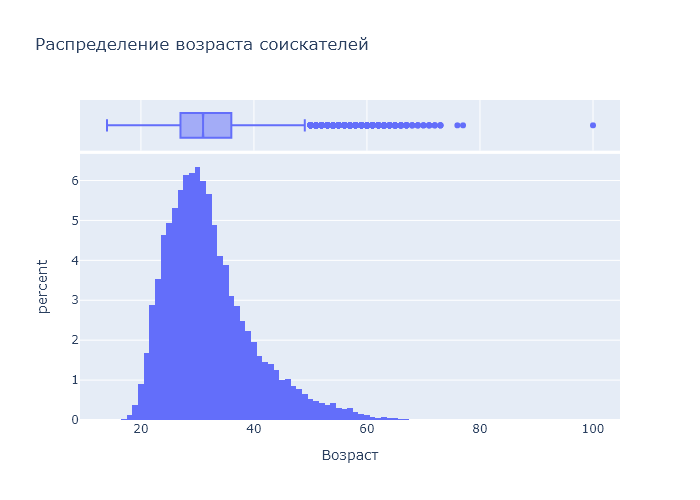

In [35]:
age_histogram = px.histogram(
    hh_database, 
    x="Возраст", 
    marginal='box', 
    histnorm='percent', 
    title ='Распределение возраста соискателей')

#age_histogram.show()
age_histogram.write_image("png/age_histogram.png")
age_histogram.show('png')


Распредление похоже на нормальное. Мода распределения возраста равна 31. Предельные значения распредления: минальное - 14 лет, максимальное - 100 лет. Большинстов соискателей имеют возраст в интевале от 21 до 36 лет. Аномалиями можно считать выбросы по коробчатой диаграмме. И это возраст больше 50 лет, и конечно, точка в 100 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

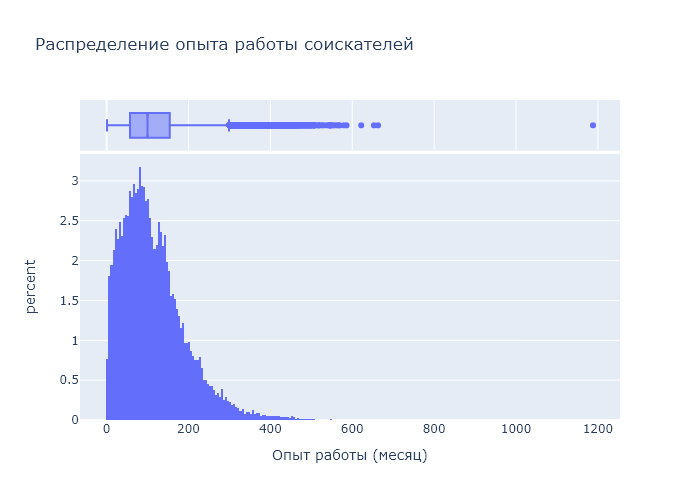

In [34]:
experience = px.histogram(
    data_frame=hh_database,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    marginal='box')

#experience.show()
experience.write_image("png/experience.png")
experience.show('png')

Распределение похоже на нормальное. Мода распределения равна 100. предельные значения признака: минимальное - 0 месяцев, максимальное 1188 месяцев.Большенство соискателей имеют опыт работы в интервале от 57 до 154 месяцев. К аномалиям можно отнести выбросы по коробчптой диаграмме - опыт работы больше 299 месяцев, и конечно точка в 1188 месяцев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


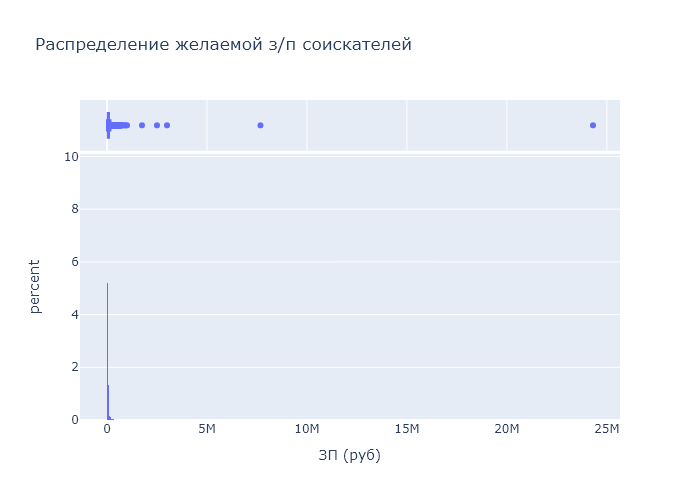

In [36]:
salary_histogram = px.histogram(
    hh_database, 
    x="ЗП (руб)", 
    marginal='box', 
    histnorm='percent', 
    title ='Распределение желаемой з/п соискателей')

#salary_histogram.show()
salary_histogram.write_image("png/salary_histogram.png")
salary_histogram.show('png')


Распредление признака видно не четко, т.к. диаграммы сильно сжаты из-за двух больших выбросов - 7 мл и 24 мл. Предельные значения признака: минимальное - 1, максимальное 24 миллиона. Большинство соискателей хотят з/п в интервале от 37 тыс до 95 тыс.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

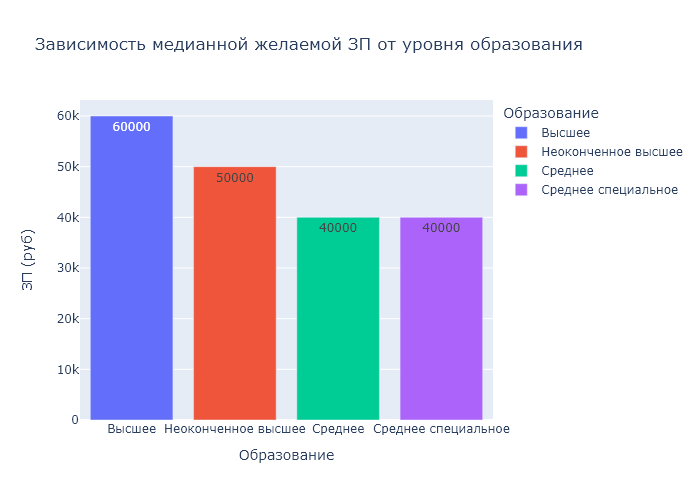

In [37]:
filter_salary = hh_database[hh_database['ЗП (руб)'] < 1000000] 
filter_education = filter_salary.groupby('Образование', as_index=False)['ЗП (руб)'].median()

education_bar = px.bar(
    data_frame=filter_education, 
    x="Образование", 
    y="ЗП (руб)", 
    color='Образование', 
    text = 'ЗП (руб)', # текст на столбцах
    orientation='v', 
    title='Зависимость медианной желаемой ЗП от уровня образования')

#education_bar.show()
education_bar.write_image("png/education_bar.png")
education_bar.show('png')

Наблюдается наибольший уровень желаемой заработной платы у соискателей с высшим образованием, и наименший уровень у соискателей со среднем и среднем специальным образованием. Считаю, что уровень образования на прямую влияет на уровень прогнозируемой заработной платы, но не менее важны практические навыки.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

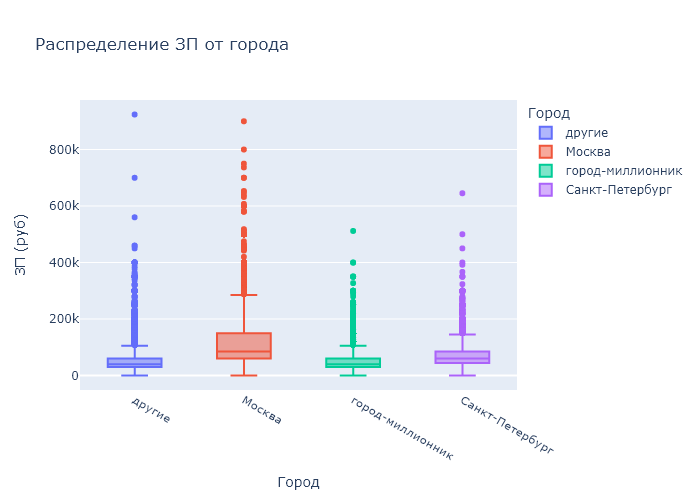

In [38]:
city_box = px.box(
    filter_salary, 
    x = 'Город', 
    y = 'ЗП (руб)', 
    color='Город', 
    title ='Распределение ЗП от города')

#city_box.show()
city_box.write_image("png/city_box.png")
city_box.show('png')

На дигармме распределения можно увидеть разный мдианный уровень ЗП в зависимости от города. В Москве - 85 тыс., Санкт-Петербург - 60 тысяч., Город-миллионник - 40тыс., Другие - 40 тысяч. Самая большая желаемая зп в Москве, самая низкая в городах-милионника и других городах. Признак города однозначно важный признак для прогнозирования желаемых заработных плат. 

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

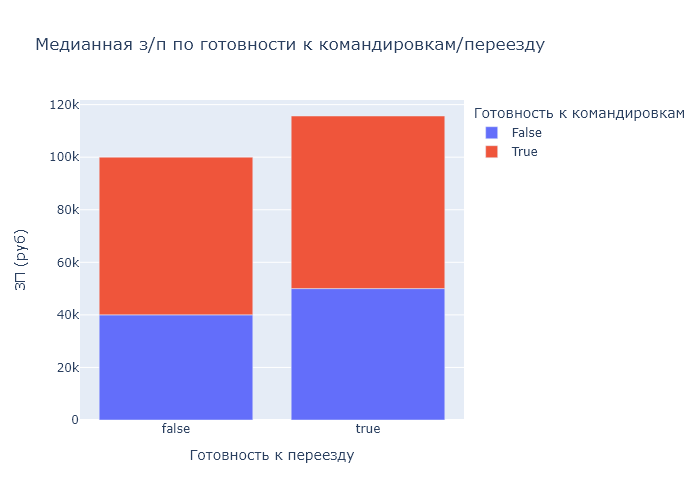

In [39]:
filter_bar = hh_database[hh_database['ЗП (руб)']<1e6].groupby(
    by=['Готовность к переезду','Готовность к командировкам'], 
    as_index=False).agg({'ЗП (руб)': 'median'})

relocation_bar = px.bar(
    data_frame=filter_bar, 
    x="Готовность к переезду",  
    y="ЗП (руб)", 
    color='Готовность к командировкам',
    title='Медианная з/п по готовности к командировкам/переезду')

#relocation_bar.show()
relocation_bar.write_image("png/relocation_bar.png")
relocation_bar.show('png')


Из графика мы видим 4 категории: 
1-готов и к командировкам и переезду. Уровень заработной платы для категории 1 составляет около 66 тысяч.
2-готов к командировкам, но не готов к переезду. Уровень заработной платы для категории 2 составляет 60 тысяч.
3-не готов к командировкам, но готов к переезду.  Уровень зп для категории 3 составляет 50 тысяч.
4- не готов ни к командировкам ни к переезду. Уровень заработной платы составляет 40 тысяч.
Можно сделать вывод, что соискаиели, которые готовы к командировкам и перезду получают зп выше других категорий соискателей. Можно также заметить, что готовность соискателя к командировкам оплачивается выше, чем готовность к переезду.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

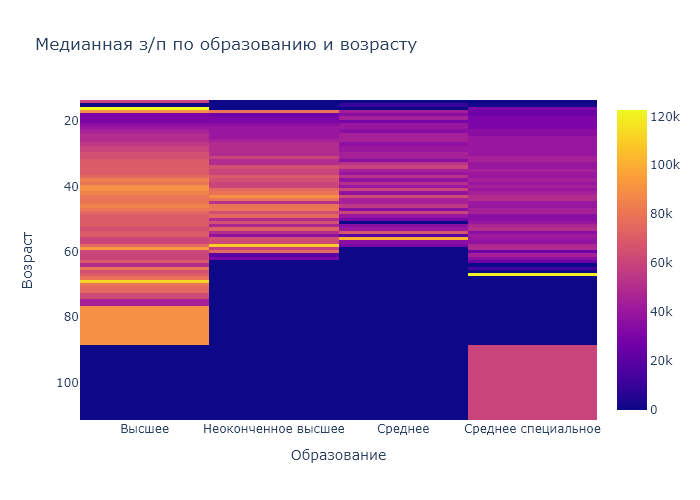

In [40]:
map_pivot = hh_database.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median',
    fill_value=0
)

heatmap = px.imshow(map_pivot, title='Медианная з/п по образованию и возрасту')

#heatmap.show()
heatmap.write_image("png/heatmap.png")
heatmap.show('png')

На графике представлены 4 категории, внутри которых можно увидеть зависимость заработной платы и возраста.
В категории высшее образование видно, как с увеличением возраста и видимо и опыта растет уровень желаемой зп. Такая тенденция идет  приблизительно до 40 лет, дальше идет чередование высоких и низких зп. В итоге уровень желаемой зп с возрастом падает. Также стоит отметить, что интерес к работе сохраняется вплоть до 77 лет, хотя в других категориях интерес к работе заканчивается на пороге 60 лет.
В категории неоконченное высшее также мы видим рост уровня желаемой зп с увеличением возраста. Также стоит отметить контрастную полосатость по сравнению с другими категориями, которые идут более плавно. Плавный рост идет до 43 лет. С увеличением возраста после 45 лет уровень желаемой зп падает. 
В категории среднее образование можно видеть не сильную тенденцию к росту. В целом уровень зп держится в интервале 40-45 тысяч, но некоторые выбиваются за эти пределы.
Самый плавный и незначительный рост в категории среднее специальное образование.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

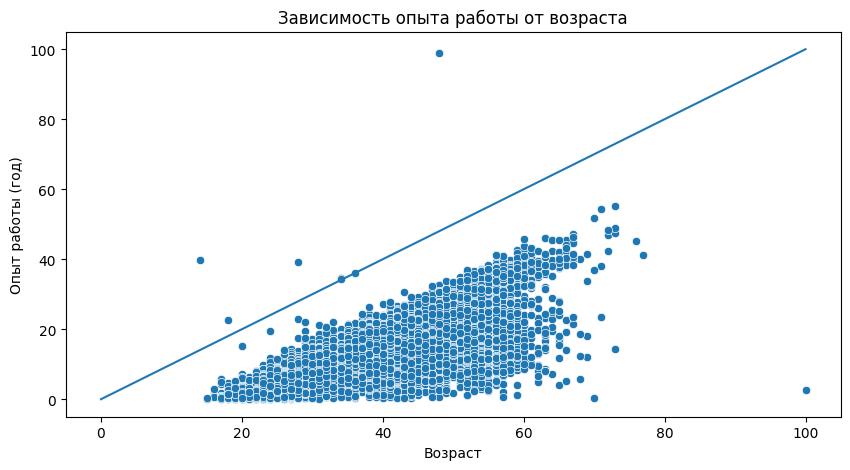

In [21]:
fig = plt.figure(figsize=(10, 5))

age_year = hh_database.copy()
age_year['Опыт работы (год)'] = age_year['Опыт работы (месяц)']/12

sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=age_year, 
    x='Возраст',
    y='Опыт работы (год)')

ax.set_title('Зависимость опыта работы от возраста');

Из графика не совсем видно, но выше прямой лежат 7 точек, которые противоречат здравому смылу, а именно опыт работы равен возрасту или того хуже опыт больше возраста. Перед нами аномалии.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


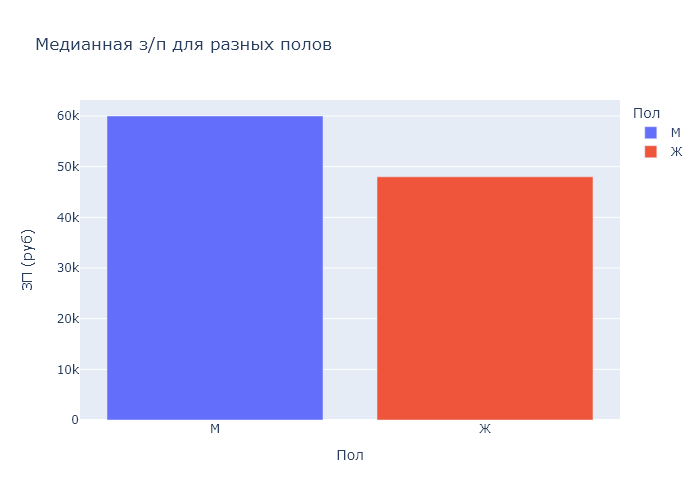

In [41]:
gender_filter = hh_database[hh_database['ЗП (руб)']<1e6].groupby('Пол', as_index=False)['ЗП (руб)'].median()

gender_bar = px.bar(
    data_frame=gender_filter, 
    x="Пол",  
    y="ЗП (руб)", 
    color='Пол',
    title='Медианная з/п для разных полов')
#gender_bar.show()
gender_bar.write_image("png/gender_bar.png")
gender_bar.show('png')

Согласно этой диаграмме, можно увидеть, что желаемая зп мужчин выше, чем у женщин. Возможно это можеть быть связанно с патриархатом в стране, а может быть с тем, что жещины больше привязны к дому(дети, семья, кошки) и реже соглашаются на командировки и переезды.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [23]:
# Поиск
mask_dup = hh_database.duplicated()
hh_duplicates = hh_database[mask_dup]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

# Удаление
hh_updated = hh_database.drop_duplicates()
print(f'Результирующее число записей: {hh_database.shape[0]}')


Число найденных дубликатов: 161
Результирующее число записей: 44744


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [24]:
hh_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  int64  
 8   Опыт работы (месяц)              44415 non-null  float64
 9   Город                            44583 non-null  object 
 10  Готовность к переезду            44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  полная занятость       

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [25]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Опыт работы (месяц)': hh_updated['Опыт работы (месяц)'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
hh_updated = hh_updated.fillna(values)

hh_updated = hh_updated.dropna(how='any', axis=0)

#выводим результирующую долю пропусков
hh_updated.isnull().mean()


Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Обновление резюме                  0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы (месяц)                0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
полная занятость                   0.0
частичная занятость                0.0
проектная работа                   0.0
волонтерство                       0.0
стажировка                         0.0
полный день                        0.0
сменный график                     0.0
гибкий график                      0.0
удаленная работа                   0.0
вахтовый метод                     0.0
ЗП (руб)                           0.0
dtype: float64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
outliers_max = hh_updated[hh_updated['ЗП (руб)'] > 1e6]
hh_updated = hh_updated.drop(outliers_max.index, axis=0)
print(f'Результирующее число записей: {hh_updated.shape[0]}')
outliers_min = hh_updated[hh_updated['ЗП (руб)'] < 1000]
hh_updated = hh_updated.drop(outliers_min.index, axis=0)
print(f'Результирующее число записей: {hh_updated.shape[0]}')

Результирующее число записей: 44576
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [27]:
age_experience = hh_updated[hh_updated['Опыт работы (месяц)']>= hh_updated['Возраст']*12]
age_experience
hh_updated = hh_updated.drop(age_experience.index, axis=0)
print(f'Результирующее число записей: {hh_updated.shape[0]}')

Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

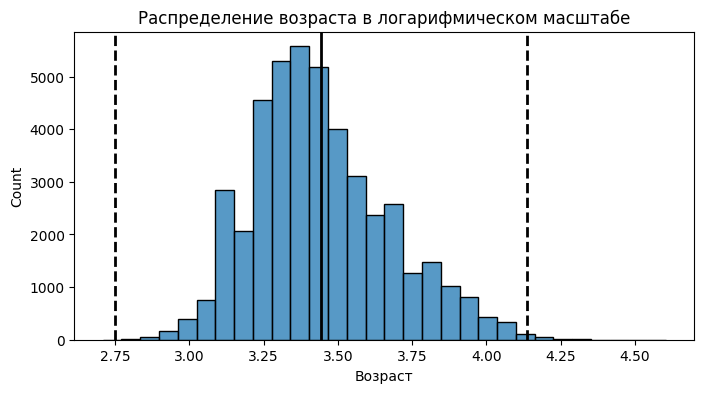

In [28]:
# Диаграмм распредления 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_updated['Возраст'])
age = sns.histplot(log_age, bins=30, ax=ax)
age.axvline(log_age.mean(), color='k', lw=2)
age.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
age.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
age.set_title('Распределение возраста в логарифмическом масштабе');

In [29]:
# Поиск выбросов с помощью метода z отклонений с послаблением
def outliers_z_score_mod(hh_updated, feature, log_scale=True, left=3 , right=4 ):
    if log_scale:
        x = np.log(hh_updated[feature])
    else:
        x = hh_updated[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = hh_updated[(x < lower_bound) | (x > upper_bound)]
    cleaned = hh_updated[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(hh_updated, 'Возраст', log_scale=True)


# Удаление ввыбросов из таблицы.
hh_updated = hh_updated.drop(outliers.index, axis=0)



Распределение имеет правостороннюю асимметрию. Под категорию выбросов попадают соискатели с возрастом 15 и 100 лет.